# Summarize PCSF output from 122815 run - December 28, 2015
##Initializations

In [1]:
%pylab inline

import sys, os, csv
sys.path.append(os.path.join('..','scripts'))
import SummarizeSif

resultsDir = os.path.join('..','..', 'results')
prizeFile = os.path.join('..','..','data','prizes','101515','combined','maxProteinScores2KM_tfPrizes.txt')

Populating the interactive namespace from numpy and matplotlib


## Summarize 12285 output
Parameters tested were $\beta$={0.25:5.0:0.25} $\mu$={0:0.1:0.005} $\omega$={0.5:3.0:0.5}.

In this run, again get many empty forests for various values of $\mu$ depending on $\beta$.  Largest forest has 2188 nodes, collects 2075 prizes but has UBC degree/forest size of 0.646252.  This is not surprising, as $\mu$=0.  There are 1802 forests with no Steiner nodes, with prizes collected ranging from 162 to 0.  Use UBC degree to help choose the optimal parameters.

In [2]:
indir = os.path.join(resultsDir, '122815')
runname = 'maxProteinScores2KM_tfPrizes'
pattern = runname + '*optimalForest.sif'
outfile = os.path.join(indir, runname + '_ForestSummary')

args = ['--indir', indir, '--pattern', pattern, '--prizefile', prizeFile, '--outfile', outfile, '--hubnode', 'UBC']
SummarizeSif.main(args)

3080 prizes loaded
2520 forests loaded
589 empty forests


## Plot distributions of forest sizes for 122815 run
Load the columns and generate plots.  Reuses old code so does not rely on pandas, but could rewrite this to be more modern.

Even many of the non-empty forests are very small.

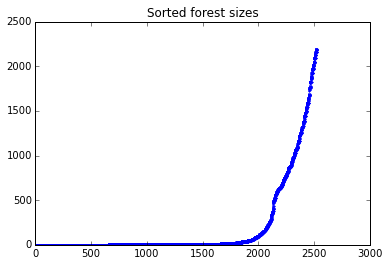

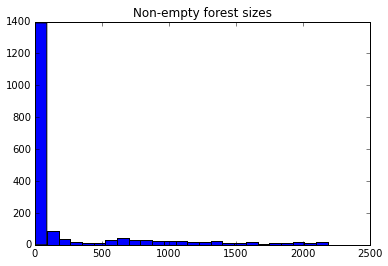

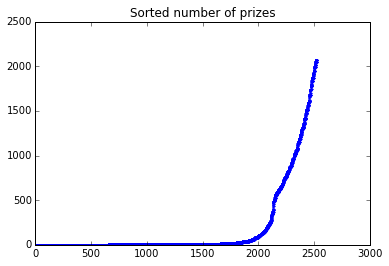

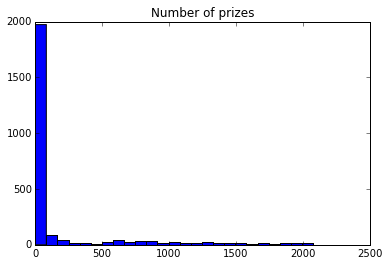

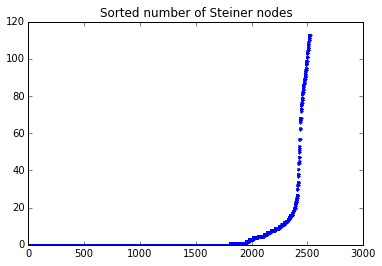

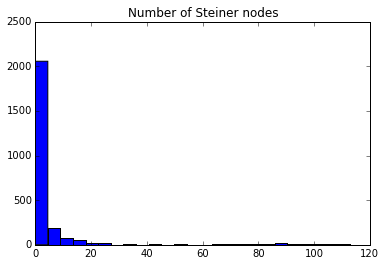

In [3]:
with open(outfile + '_size.txt') as sizeFile:
    reader = csv.DictReader(sizeFile, delimiter = '\t')
    sizeContents = list(reader)
forestSizes = [int(row['Forest size']) for row in sizeContents]
plot(sorted(forestSizes), '.');
title('Sorted forest sizes');
figure()
hist([s for s in forestSizes if s > 0], 25);
title('Non-empty forest sizes');

figure()
prizes = [int(row['Prizes in forest']) for row in sizeContents]
plot(sorted(prizes), '.');
title('Sorted number of prizes');
figure()
hist(prizes, 25);
title('Number of prizes');

figure()
steinerNodes = [int(row['Steiner nodes']) for row in sizeContents]
plot(sorted(steinerNodes), '.');
title('Sorted number of Steiner nodes');
figure()
hist(steinerNodes, 25);
title('Number of Steiner nodes');

## Plot distributions of UBC hub protein degree for 122815 run
1534 forests do not contain UBC and are non-empty.  Largest forest that does not contain UBC has 635 nodes, 602 prizes (**maxProteinScores2KM_tfPrizes_beta4.75_mu0.020_omega2.5_seed122815_optimalForest.sif**).


There are very few similarly structured forests based on the 'No UBC, non-empty forest size' plot.  The same settings with $\beta$=4.50 give a similar forest, but most others without UBC are much smaller.  Nevertheless, use these parameters in the full random run.  Criteria used to select them was: forest does not contain UBC, max forest size (same as max prizes here).

Params are $\beta$=4.75 $\mu$=0.020 $\omega$=2.5.  As intended, this forest contains the top-scoring TFs with large prizes: IRF1, IRF2, STAT2, ZNF148, IRF7, etc.

Max forest size that does not contain UBC: 635
Number of non-empty, no UBC forests: 1534


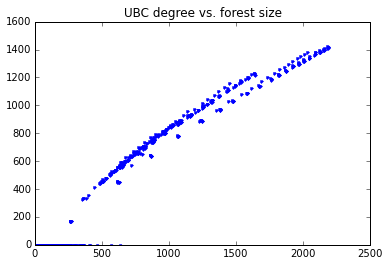

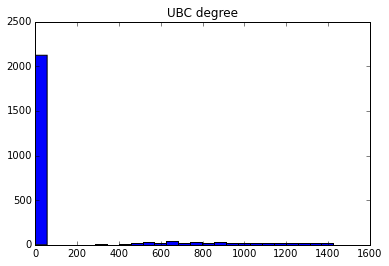

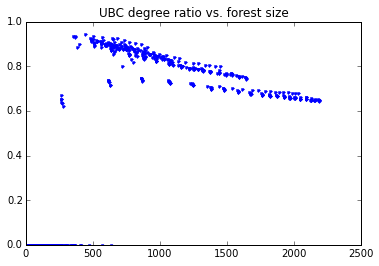

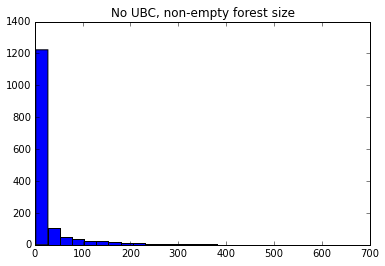

In [4]:
ubcDegree = [int(row['UBC degree']) for row in sizeContents]
plot(forestSizes, ubcDegree, '.');
title('UBC degree vs. forest size');
figure()
hist(ubcDegree, 25);
title('UBC degree');

figure()
ubcDegreeRatio = [float(row['UBC degree / forest size']) for row in sizeContents]
plot(forestSizes, ubcDegreeRatio, '.');
title('UBC degree ratio vs. forest size');

noUbcNonemptyForestSize = [int(row['Forest size']) for row in sizeContents if int(row['UBC degree']) == 0 and int(row['Forest size']) > 0]
print 'Max forest size that does not contain UBC: %d' % max(noUbcNonemptyForestSize)
print 'Number of non-empty, no UBC forests: %d' % len(noUbcNonemptyForestSize)
figure()
hist(noUbcNonemptyForestSize, 25);
title('No UBC, non-empty forest size');